# Fortofolio Optimization
## Should your fund invest in Bitcoin?

## 📖 Background
You work as an analyst at an investment fund in New York. Your CFO wants to explore if it is a good idea to invest some of the fund's assets in Bitcoin. You have to prepare a report on this asset and how it compares to the stock market in general.

## 💾 The data
You have access to three files:

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

In [1]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import datetime as dt
from pandas.plotting import scatter_matrix

# Visualization 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
plt.style.use('fivethirtyeight')


# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
bitcoin = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'],index_col=['date'])
bitcoin.head()

,open,high,low,close,volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [3]:
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'],index_col=['date'])
sp500.head()

,open,high,low,close,volume
date,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [4]:
monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'],index_col=['date'])
monthly_data.head()

,gold_usd,cpi_us
date,,
2014-09-01,1241.330,237.852
2014-10-01,1223.565,238.031
2014-11-01,1176.413,237.433
2014-12-01,1200.440,236.151
2015-01-01,1249.333,234.812


## 💪 Challenge
Create a report that covers the following:

1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
3. The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

# Exploratory Analysis

### Data Description
This is an overview of the data that we will analyze. from here we can see the characteristics of each data. 

It seems that the data from each data set has a different total, so maybe later we will need to make adjustments if we want to compare the three types of assets. 

From here, we can already guess that Bitcoin has a very large standard deviation compared to the SP 500 and gold. That means Bitcoin has greater volatility than SP 500 and gold, but we will see more detail and accurate in the analysis below.

In [5]:
bitcoin.describe()

,open,high,low,close,volume
count,2615.000000,2615.000000,2615.000000,2615.000000,2.615000e+03
mean,10051.643066,10334.482966,9750.736512,10073.814423,1.400155e+10
std,14892.430109,15326.320248,14422.269302,14923.069664,1.993158e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,582.071015,588.960998,575.311981,582.555999,7.489110e+07
50%,5745.599121,5865.881836,5544.089844,5750.799805,4.679500e+09
75%,9866.986328,10136.996094,9642.615235,9870.199219,2.287606e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


In [6]:
sp500.describe()

,open,high,low,close,volume
count,1805.000000,1805.000000,1805.000000,1805.000000,1.805000e+03
mean,2755.938758,2769.524277,2741.245103,2756.455533,3.844502e+09
std,698.212835,701.268104,695.674679,698.850564,9.781460e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1.296540e+09
25%,2123.159912,2129.870117,2114.719971,2124.290039,3.254950e+09
50%,2664.439941,2682.860107,2648.870117,2663.989990,3.623320e+09
75%,3045.750000,3068.669922,3012.590088,3039.419922,4.154240e+09
max,4707.250000,4718.500000,4694.390137,4701.700195,9.878040e+09


In [7]:
monthly_data.describe()

,gold_usd,cpi_us
count,87.000000,87.000000
mean,1403.186678,249.790759
std,257.985374,10.733951
min,1068.317000,233.707000
25%,1231.081500,240.428500
50%,1283.189000,249.554000
75%,1577.216000,257.091000
max,2041.700000,276.589000


### Missing Values & Imputation
There seems to be some missing data there, so we will try to impute the lost data with KNN Imputer so that there are no problems during analysis.

This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set.

This method is quite effective for data types like this where usually one part of the data does not differ much from other adjacent data

In [8]:
bitcoin.isnull().sum()

open      4
high      4
low       4
close     4
volume    4
dtype: int64

In [9]:
sp500.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [10]:
monthly_data.isnull().sum()

gold_usd    0
cpi_us      0
dtype: int64

In [11]:
bitcoin_new=bitcoin.copy()

In [12]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=5)

In [13]:
bitcoin_new[['open','high','low','close','volume']] = knn_imp.fit_transform(bitcoin_new[['open','high','low','close','volume']])

In [14]:
bitcoin_new.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

Now, no more missing data, so we can start doing analysis

In [15]:
bitcoin_new.head()

,open,high,low,close,volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


## Performance of Bitcoin, S&P500, and Gold (2014-2021)
First we will try to see first how the price trend of bitcoin, sp500 and gold from 2014-2021

Text(0.5, 1.0, 'Bitcoin Price (2014-2021)')

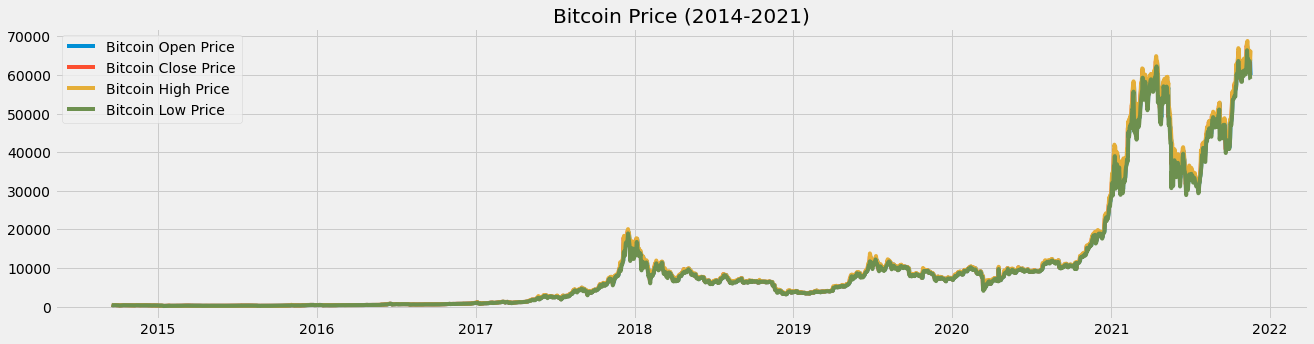

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(bitcoin_new['open'],label='Bitcoin Open Price')
plt.plot(bitcoin_new['close'],label='Bitcoin Close Price')
plt.plot(bitcoin_new['high'],label='Bitcoin High Price')
plt.plot(bitcoin_new['low'],label='Bitcoin Low Price')
plt.legend()
plt.title('Bitcoin Price (2014-2021)')

Text(0.5, 1.0, 'S&P 500 Index (2014-2021)')

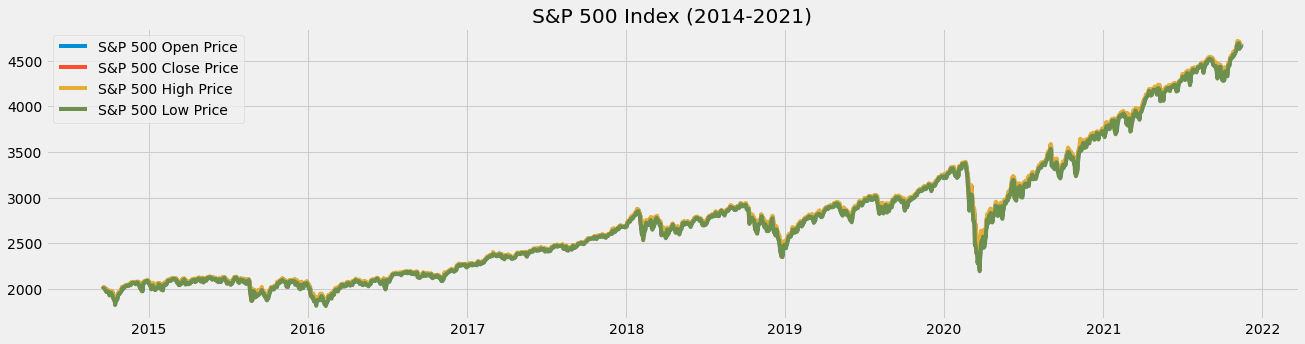

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(sp500['open'],label='S&P 500 Open Price')
plt.plot(sp500['close'],label='S&P 500 Close Price')
plt.plot(sp500['high'],label='S&P 500 High Price')
plt.plot(sp500['low'],label='S&P 500 Low Price')
plt.legend()
plt.title('S&P 500 Index (2014-2021)')

Text(0.5, 1.0, 'GOLD/USD (2014-2021)')

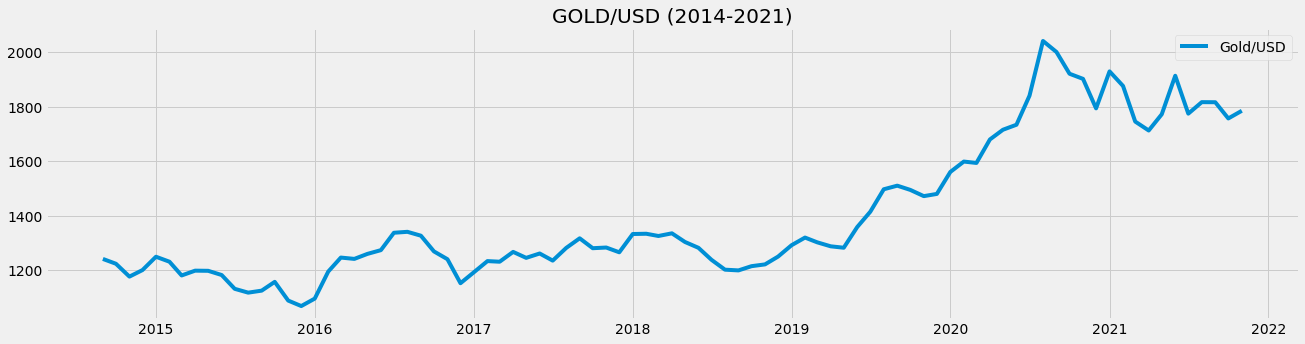

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(monthly_data['gold_usd'],label='Gold/USD')
plt.legend()
plt.title('GOLD/USD (2014-2021)')

Text(0.5, 1.0, 'Price of Bitcoin, SP500, and Gold vs Time')

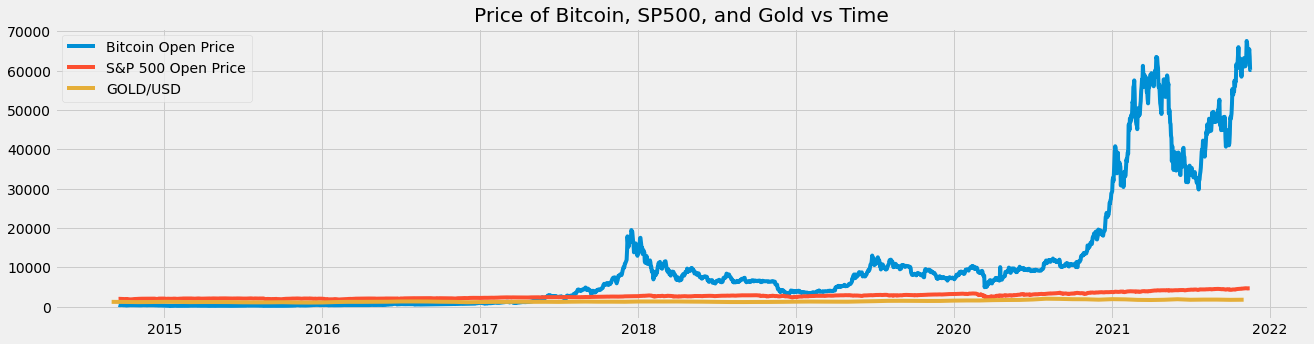

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(bitcoin_new['close'],label='Bitcoin Open Price')
plt.plot(sp500['close'],label='S&P 500 Open Price')
plt.plot(monthly_data['gold_usd'],label='GOLD/USD')
plt.legend()
plt.title('Price of Bitcoin, SP500, and Gold vs Time')

##### From this chart it is clear that bitcoin does have a very significant price increase from 2014-2021, but its price fluctuations are also very high. On the other hand, sp500 and gold have relatively stable fluctuations but the price increase is also not as big as bitcoin.

## Volume of Bitcoin and S&P500

Text(0.5, 1.0, 'Bitcoin vs SP500')

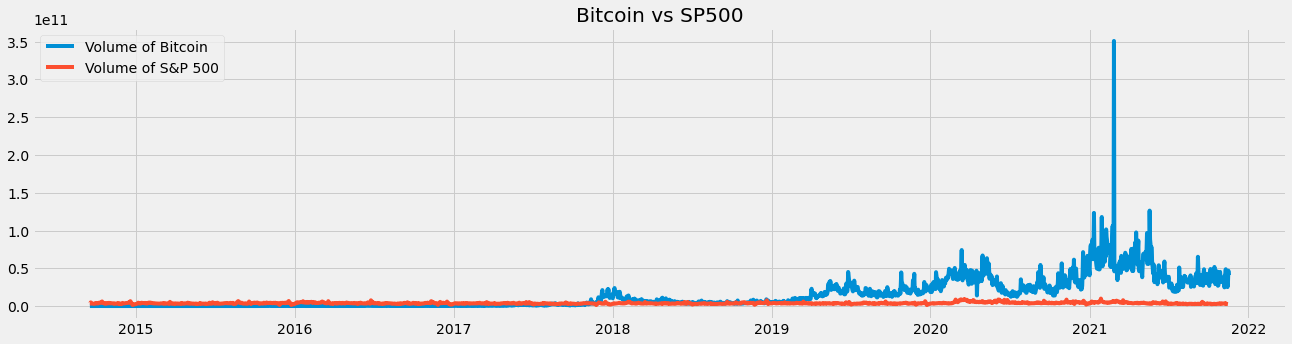

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(bitcoin_new['volume'],label='Volume of Bitcoin')
plt.plot(sp500['volume'],label='Volume of S&P 500')
plt.legend()
plt.title('Bitcoin vs SP500')

## Monthly Percentage Change
We will use price changes per month because the largest time base of the three data is calculated per month, so to make it easier to make comparisons of Bitcoin, SP500, and gold we will first create the same time base from the three data.

In [21]:
prices = bitcoin_new.close.copy()
BTC = prices.to_frame().copy()

BTC = BTC.asfreq('BM').close.pct_change()
BTC = BTC.to_frame().copy()
BTC['returns'] = BTC['close']
del BTC['close']
BTC

,returns
date,
2014-09-30,NaN
2014-10-31,-0.125659
2014-11-28,0.112692
2014-12-31,-0.149434
2015-01-30,-0.292848
...,...
2021-06-30,-0.061394
2021-07-30,0.205324
2021-08-31,0.116753


In [22]:
prices = sp500.close.copy()
SP500 = prices.to_frame().copy()

SP500 = SP500.asfreq('BM').close.pct_change()
SP500 = SP500.to_frame().copy()
SP500['returns'] = SP500['close']
del SP500['close']
SP500

,returns
date,
2014-09-30,NaN
2014-10-31,0.023201
2014-11-28,0.024534
2014-12-31,-0.004189
2015-01-30,-0.031041
...,...
2021-06-30,0.027822
2021-07-30,0.022748
2021-08-31,0.028990


In [23]:
GOLD = monthly_data['gold_usd'].pct_change()
GOLD = GOLD.to_frame().copy()
GOLD['returns'] = GOLD['gold_usd']
del GOLD['gold_usd']
GOLD

,returns
date,
2014-09-01,NaN
2014-10-01,-0.014311
2014-11-01,-0.038537
2014-12-01,0.020424
2015-01-01,0.040729
...,...
2021-07-01,-0.072679
2021-08-01,0.023777
2021-09-01,-0.000165


In [24]:
# we will delete the data on the 11th month 2021 fromm GOLD df, so that it has the same row as another df
last_row = len(GOLD)-1
GOLD =GOLD.drop(GOLD.index[last_row])

In [25]:
GOLD

,returns
date,
2014-09-01,NaN
2014-10-01,-0.014311
2014-11-01,-0.038537
2014-12-01,0.020424
2015-01-01,0.040729
...,...
2021-06-01,0.079774
2021-07-01,-0.072679
2021-08-01,0.023777


# Volatility
We will use a histogram to determine the level of volatility of each asset.

The larger or wider the histogram, the greater the level of volatility

Text(0.5, 1.0, 'Volatility of Bitcoin')

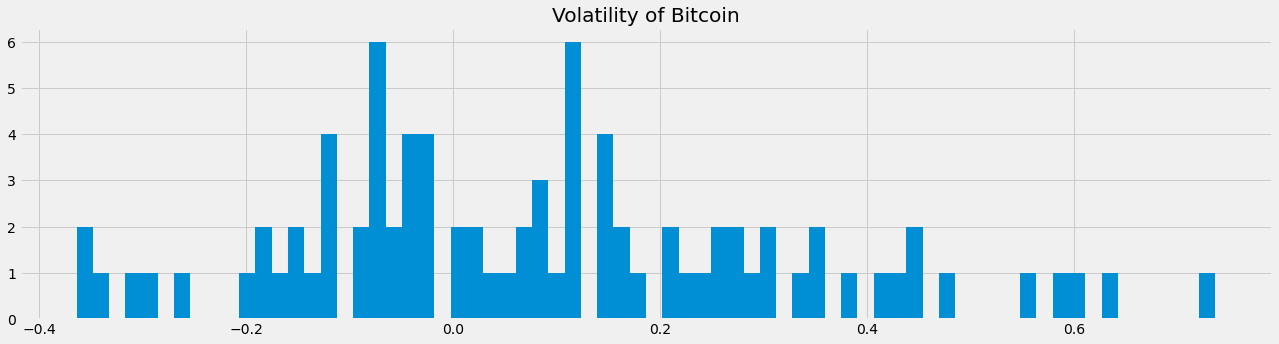

In [26]:
plt.figure(figsize=(20, 5))
BTC['returns'].hist(bins=70)
plt.title('Volatility of Bitcoin')

Text(0.5, 1.0, 'Volatility of SP500')

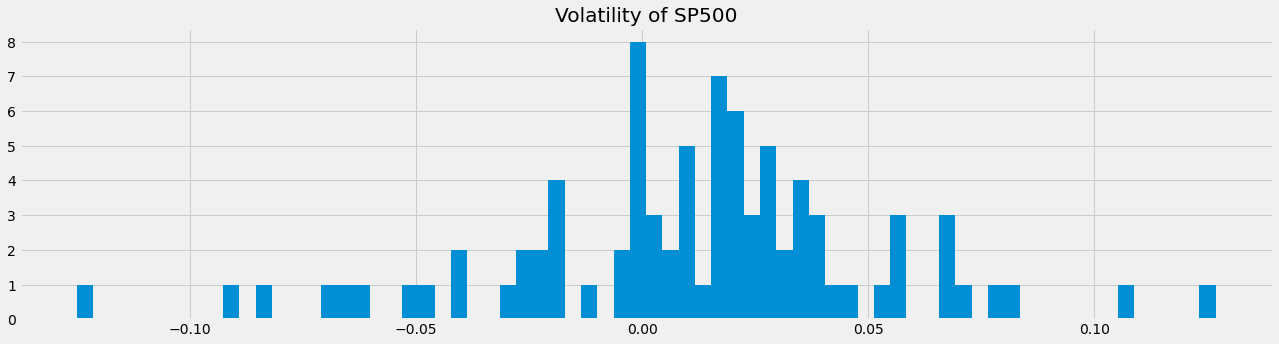

In [27]:
plt.figure(figsize=(20, 5))
SP500['returns'].hist(bins=70)
plt.title('Volatility of SP500')

Text(0.5, 1.0, 'Volatility of Gold')

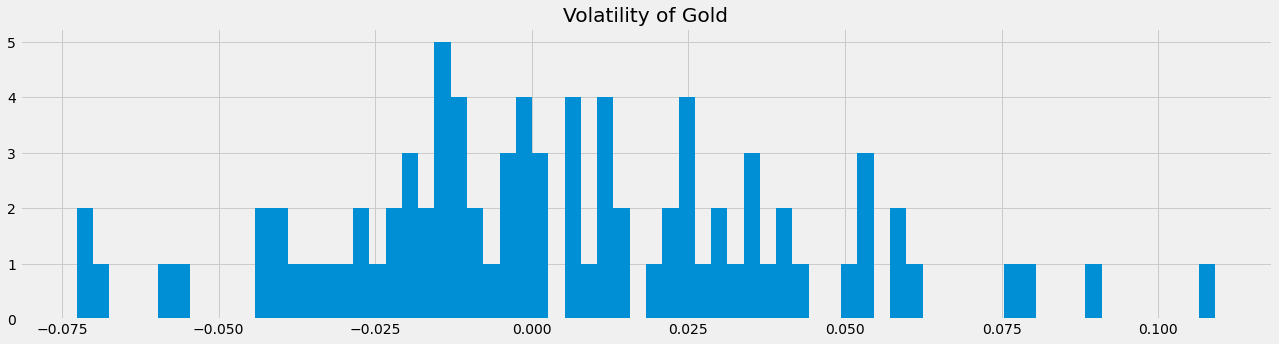

In [28]:
plt.figure(figsize=(20, 5))
GOLD['returns'].hist(bins=70)
plt.title('Volatility of Gold')

Text(0.5, 1.0, 'Comparison Volatility Bitcoin, Sp500, & Gold')

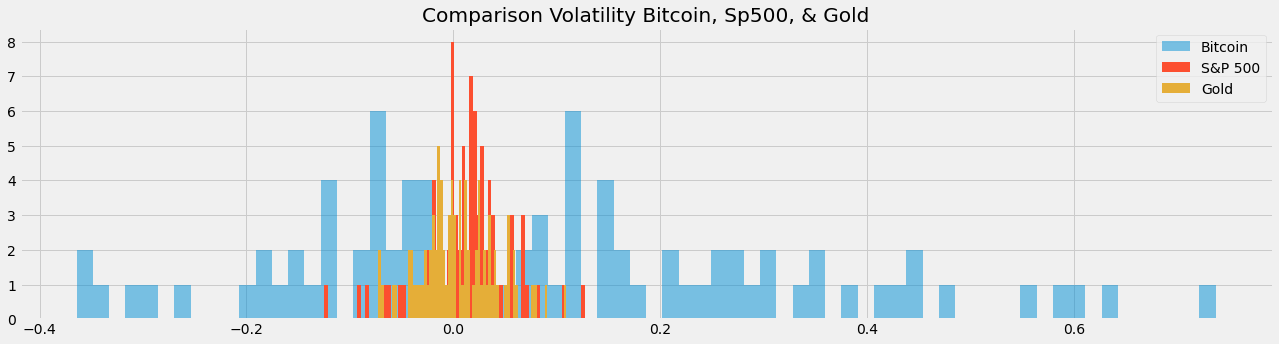

In [29]:
plt.figure(figsize=(20, 5))
BTC['returns'].hist(bins=70,label='Bitcoin',alpha=0.5)
SP500['returns'].hist(bins=70,label='S&P 500')
GOLD['returns'].hist(bins=70,label='Gold')
plt.legend()
plt.title('Comparison Volatility Bitcoin, Sp500, & Gold')

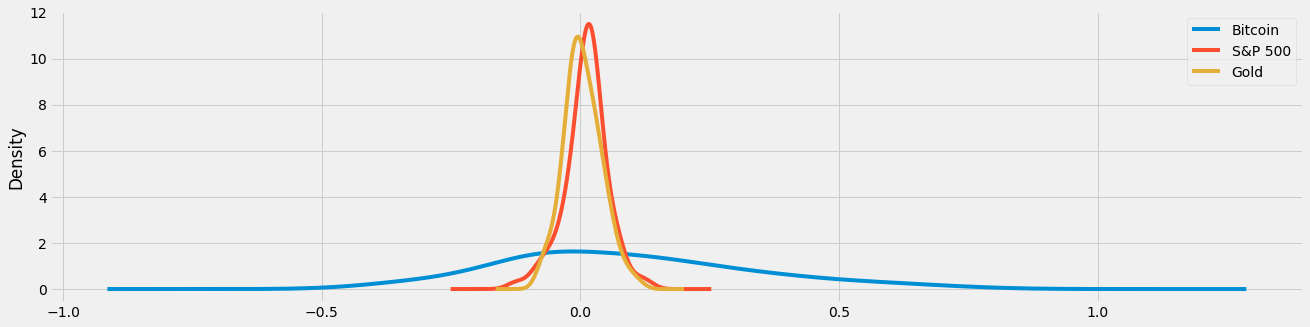

In [30]:
plt.figure(figsize=(20, 5))
BTC['returns'].plot(kind='kde',label='Bitcoin')
SP500['returns'].plot(kind='kde',label='S&P 500')
GOLD['returns'].plot(kind='kde',label='Gold')
plt.legend()

### From this chart, it's clear that bitcoin has a much higher level of volatility than sp500 and gold. While sp500 and gold have relatively the same level volatility

## Cummulative Return

In [31]:
BTC['cummulative_return'] = (1+BTC['returns']).cumprod()-1
SP500['cummulative_return'] = (1+SP500['returns']).cumprod()-1
GOLD['cummulative_return'] = (1+GOLD['returns']).cumprod()-1

Text(0.5, 1.0, 'Cummulative return')

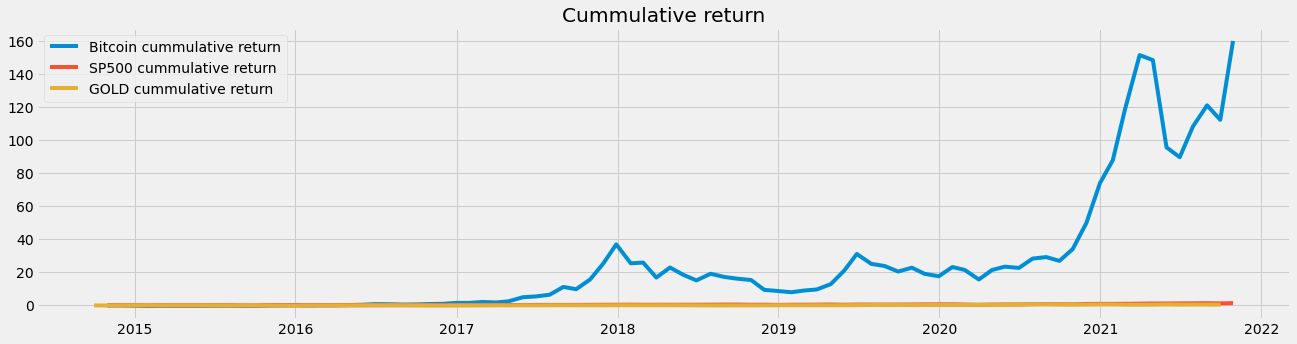

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(BTC['cummulative_return'],label='Bitcoin cummulative return')
plt.plot(SP500['cummulative_return'],label='SP500 cummulative return')
plt.plot(GOLD['cummulative_return'],label='GOLD cummulative return')

plt.legend()
plt.title('Cummulative return')

#### If we look at the cumulative return, it looks like bitcoin has a much higher cumulative return than the sp500 and gold. And the cumulative return of sp500 and gold is relatively the same

# Fortofolio Optimization
Now we will try to optimize our portfolio by creating various combinations of portfolios to determine which one is the most optimal based on the risk.

In [33]:
BTC = BTC.reset_index()
SP500 = SP500.reset_index()
GOLD = GOLD.reset_index()


## Model 1

In [40]:

Bitcoin = BTC['returns']
SP_500 = SP500['returns']
GOLD_USD = GOLD['returns']
assets = ['Bitcoin','SP_500','GOLD_USD']
number_of_portofolio = 10000
RF = 0
portofolio_return1 = []
portofolio_risk1 =[] 
sharpe_ratios1 = []
portofolio_weight1 = []

returns = pd.DataFrame()
for asset in assets:
    data = pd.DataFrame(eval(asset)) 
    data[asset] = data['returns']
    
    if returns.empty:
        returns = data[[asset]]
    else:
        returns = returns.join(data[[asset]],how='outer')
        
for fortofolio in range(number_of_portofolio):
    # General random portofolio weight
    weight= np.random.random_sample(3)
    weight= np.round((weight/np.sum(weight)),3) 
    portofolio_weight1.append(weight)
    
    # Calculate annual return
    annual_return = np.sum(returns.mean() * weight) * 12
    portofolio_return1.append(annual_return)

    # Matrix covarince and risk calculation
    matrix_covariance = returns.cov() * 12
    portofolio_variance = np.dot(weight.T,np.dot(matrix_covariance, weight))
    portofolio_sd = np.sqrt(portofolio_variance) 
    portofolio_risk1.append(portofolio_sd)
    
    # Sharp ratio
    sharpe_ratio = (annual_return-RF)/portofolio_sd
    sharpe_ratios1.append(sharpe_ratio)
    
portofolio_return = np.array(portofolio_return1)
portofolio_risk = np.array(portofolio_risk1)                     
sharpe_ratios = np.array(sharpe_ratios1)     

portofolio_metrics = [portofolio_return,portofolio_risk,sharpe_ratios,portofolio_weight1]
    
portofolio_df = pd.DataFrame(portofolio_metrics).T
portofolio_df.columns = ['Return','Risk','Sharpe','Weights']                      
                      
min_risk = portofolio_df.iloc[portofolio_df['Risk'].astype(float).idxmin()]                   

print('Lowest Risk')
print(min_risk)                      
print(assets)                      
print('') 
                      

Lowest Risk
Return                 0.096912
Risk                   0.098697
Sharpe                 0.981916
Weights    [0.01, 0.409, 0.581]
Name: 7410, dtype: object
['Bitcoin', 'SP_500', 'GOLD_USD']



## Model 2

In [41]:

Bitcoin = BTC['returns']
SP_500 = SP500['returns']
assets = ['Bitcoin','SP_500']
number_of_portofolio = 10000
RF = 0
portofolio_return2 = []
portofolio_risk2 =[] 
sharpe_ratios2 = []
portofolio_weight2 = []

returns = pd.DataFrame()
for asset in assets:
    data = pd.DataFrame(eval(asset)) 
    data[asset] = data['returns']
    
    if returns.empty:
        returns = data[[asset]]
    else:
        returns = returns.join(data[[asset]],how='outer')
        
for fortofolio in range(number_of_portofolio):
    # General random portofolio weight
    weight= np.random.random_sample(2)
    weight= np.round((weight/np.sum(weight)),3) 
    portofolio_weight2.append(weight)
    
    # Calculate annual return
    annual_return = np.sum(returns.mean() * weight) * 12
    portofolio_return2.append(annual_return)

    # Matrix covarince and risk calculation
    matrix_covariance = returns.cov() * 12
    portofolio_variance = np.dot(weight.T,np.dot(matrix_covariance, weight))
    portofolio_sd = np.sqrt(portofolio_variance) 
    portofolio_risk2.append(portofolio_sd)
    
    # Sharp ratio
    sharpe_ratio = (annual_return-RF)/portofolio_sd
    sharpe_ratios2.append(sharpe_ratio)
    
portofolio_return = np.array(portofolio_return2)
portofolio_risk = np.array(portofolio_risk2)                     
sharpe_ratios = np.array(sharpe_ratios2)     

portofolio_metrics = [portofolio_return,portofolio_risk,sharpe_ratios,portofolio_weight2]
    
portofolio_df = pd.DataFrame(portofolio_metrics).T
portofolio_df.columns = ['Return','Risk','Sharpe','Weights']                      
                      
min_risk = portofolio_df.iloc[portofolio_df['Risk'].astype(float).idxmin()]                   

print('Lowest Risk')
print(min_risk)                      
print(assets)                      
print('') 
                      

Lowest Risk
Return       0.130541
Risk         0.143572
Sharpe       0.909236
Weights    [0.0, 1.0]
Name: 2666, dtype: object
['Bitcoin', 'SP_500']



## Model 3

In [42]:

Bitcoin = BTC['returns']
GOLD_USD = GOLD['returns']
assets = ['Bitcoin','GOLD_USD']
number_of_portofolio = 10000
RF = 0
portofolio_return3 = []
portofolio_risk3 =[] 
sharpe_ratios3 = []
portofolio_weight3 = []

returns = pd.DataFrame()
for asset in assets:
    data = pd.DataFrame(eval(asset)) 
    data[asset] = data['returns']
    
    if returns.empty:
        returns = data[[asset]]
    else:
        returns = returns.join(data[[asset]],how='outer')
        
for fortofolio in range(number_of_portofolio):
    # General random portofolio weight
    weight= np.random.random_sample(2)
    weight= np.round((weight/np.sum(weight)),3) 
    portofolio_weight3.append(weight)
    
    # Calculate annual return
    annual_return = np.sum(returns.mean() * weight) * 12
    portofolio_return3.append(annual_return)
    
    # Matrix covarince and risk calculation
    matrix_covariance = returns.cov() * 12
    portofolio_variance = np.dot(weight.T,np.dot(matrix_covariance, weight))
    portofolio_sd = np.sqrt(portofolio_variance) 
    portofolio_risk3.append(portofolio_sd)
    
    # Sharp ratio
    sharpe_ratio = (annual_return-RF)/portofolio_sd
    sharpe_ratios3.append(sharpe_ratio)
    
portofolio_return = np.array(portofolio_return3)
portofolio_risk = np.array(portofolio_risk3)                     
sharpe_ratios = np.array(sharpe_ratios3)     

portofolio_metrics = [portofolio_return,portofolio_risk,sharpe_ratios,portofolio_weight3]
    
portofolio_df = pd.DataFrame(portofolio_metrics).T
portofolio_df.columns = ['Return','Risk','Sharpe','Weights']                      
                      
min_risk = portofolio_df.iloc[portofolio_df['Risk'].astype(float).idxmin()]                   

print('Lowest Risk')
print(min_risk)                      
print(assets)                      
print('') 
                      

Lowest Risk
Return            0.10137
Risk             0.119867
Sharpe           0.845689
Weights    [0.045, 0.955]
Name: 1401, dtype: object
['Bitcoin', 'GOLD_USD']



## Model 4

In [37]:
SP_500 = SP500['returns']
GOLD_USD = GOLD['returns']
assets = ['SP_500','GOLD_USD']
number_of_portofolio = 10000
RF = 0
portofolio_return4 = []
portofolio_risk4 =[] 
sharpe_ratios4 = []
portofolio_weight4 = []

returns = pd.DataFrame()
for asset in assets:
    data = pd.DataFrame(eval(asset)) 
    data[asset] = data['returns']
    
    if returns.empty:
        returns = data[[asset]]
    else:
        returns = returns.join(data[[asset]],how='outer')
        
for fortofolio in range(number_of_portofolio):
    # General random portofolio weight
    weight= np.random.random_sample(2)
    weight= np.round((weight/np.sum(weight)),3) 
    portofolio_weight4.append(weight)
    
    # Calculate annual return
    annual_return = np.sum(returns.mean() * weight) * 12
    portofolio_return4.append(annual_return)

    # Matrix covarince and risk calculation
    matrix_covariance = returns.cov() * 12
    portofolio_variance = np.dot(weight.T,np.dot(matrix_covariance, weight))
    portofolio_sd = np.sqrt(portofolio_variance) 
    portofolio_risk4.append(portofolio_sd)
    
    # Sharp ratio
    sharpe_ratio = (annual_return-RF)/portofolio_sd
    sharpe_ratios4.append(sharpe_ratio)
    
portofolio_return = np.array(portofolio_return4)
portofolio_risk = np.array(portofolio_risk4)                     
sharpe_ratios = np.array(sharpe_ratios4)     

portofolio_metrics = [portofolio_return,portofolio_risk,sharpe_ratios,portofolio_weight4]
    
portofolio_df = pd.DataFrame(portofolio_metrics).T
portofolio_df.columns = ['Return','Risk','Sharpe','Weights']                      
                      
min_risk = portofolio_df.iloc[portofolio_df['Risk'].astype(float).idxmin()]                   

print('Lowest Risk')
print(min_risk)                      
print(assets)                      
print('') 
                      

Lowest Risk
Return           0.088434
Risk             0.098967
Sharpe           0.893573
Weights    [0.428, 0.572]
Name: 1266, dtype: object
['SP_500', 'GOLD_USD']



In [43]:

models = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 
              'Model 4'],
    'Risk': [
        min(portofolio_risk1), 
        min(portofolio_risk2),      
        min(portofolio_risk3), 
        min(portofolio_risk4)],
    'Return': [
        max(portofolio_return1), 
        max(portofolio_return2),      
        max(portofolio_return3), 
        max(portofolio_return4)],
    'Sharpe ratio': [
        max(sharpe_ratios1), 
        max(sharpe_ratios2),      
        max(sharpe_ratios3), 
        max(sharpe_ratios4)]

    })
print('---Risk Score---')
models.sort_values(by='Risk', ascending=True)

---Risk Score---


,Model,Risk,Return,Sharpe ratio
0,Model 1,0.098697,1.031786,1.511806
3,Model 4,0.098967,0.130541,0.981153
2,Model 3,0.119867,1.044534,1.429765
1,Model 2,0.143572,1.044534,1.390966


# Recommendation : Model 1
### So based on the simulation results, the most optimal portfolio to get the smallest risk is Model 1
# Bitcoin : 1% | S&P 500 : 40.9% | Gold : 58.1%
# Risk : 9.87%
### or we can also consider using model 4 because it has a risk value that is not much different from model 1
# S&P 500 : 42.8% | Gold : 57.2%
# Risk : 9.9%
### this choice means we don't invest in bitcoin, but if we consider the return value and sharpe ratio, model 1 is more recommended